In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyroomacoustics as pra
import audio_functions as af
import plot
from scipy import signal
import IPython

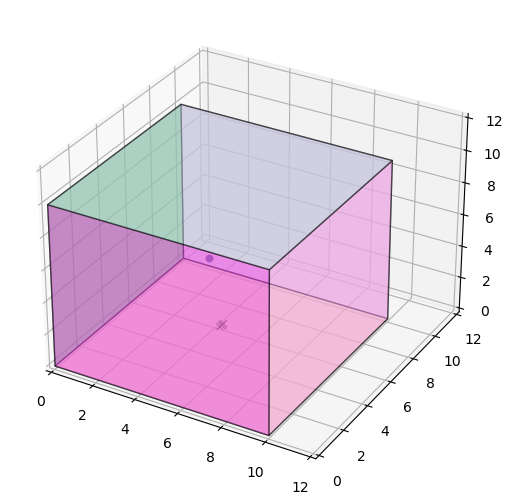

In [3]:
#Determino coeficiente de absorción 0 para simular campo reverberante y lo convierto en un material
abs_prom = pra.Material(0.01)

#Determino dimensiones y frecuencia de sampleo, dimensiones muy grandes para campo libre
room_dim = [10, 10, 10]
fs = 48000

#Creo la habitación
room = pra.ShoeBox(room_dim, fs=fs, max_order=100, materials=abs_prom, sigma2_awgn=0.000001, air_absorption=True, temperature=20, humidity=40)

#Cargo el audio para poder asignarlo a la fuente
audio, _ =af.load_audio("audios_anecoicos/p336_001.wav")

#Agrego fuente a la sala
room.add_source([2, 8.9, 1.5], signal=audio)

#Agrego array de mics a la sala
d_mic = 0.1
mic_array_loc = np.c_[[5, 4.7, 1.2], [5, 4.7+d_mic, 1.2], [5, 4.7+(d_mic*2), 1.2], [5, 4.7+(d_mic*3), 1.2]]
room.add_microphone_array(mic_array_loc)

fig, ax = room.plot(mic_marker_size=30, source_marker_size=30)
ax.set_xlim([0,12])
ax.set_ylim([0,12])
ax.set_zlim([0,12])

af.play_audio(audio,fs)

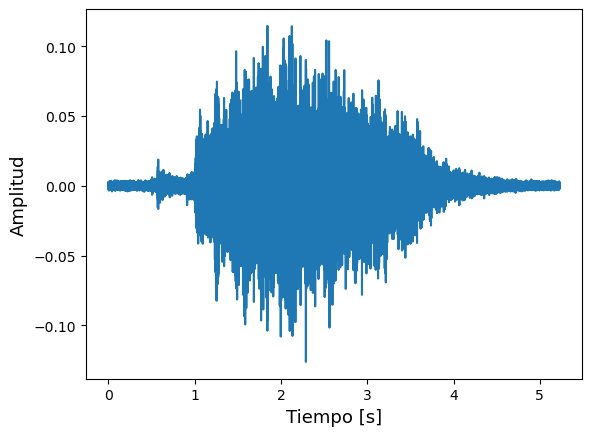

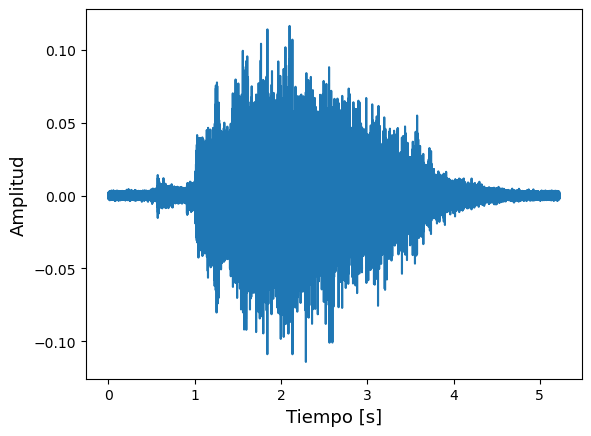

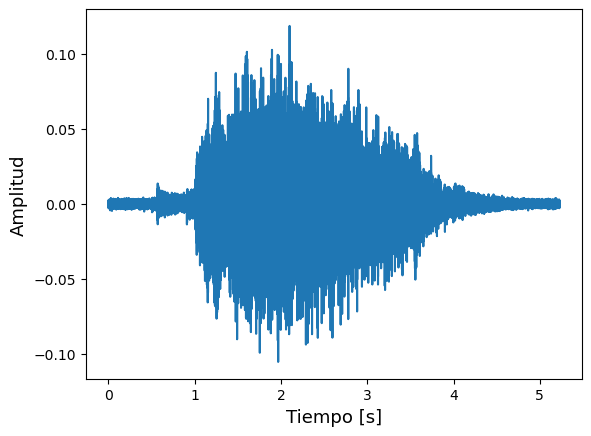

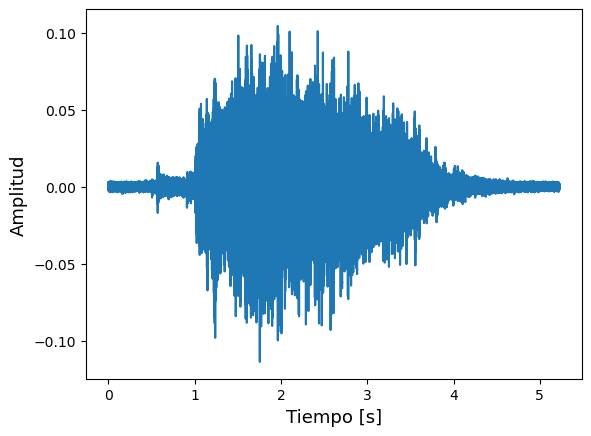

250854


In [5]:
#Realizo la simulación
room.simulate()

#Obtengo cada audio grabado en la sala
grabaciones = room.mic_array.signals

for i in np.arange(len(grabaciones)):
    mic_i = grabaciones[i]
    dur, t = af.get_audio_time_array(mic_i, fs)
    mic_plot = {"time vector":t, "signal":mic_i, "label":f"Señal del Micrófono {i}"}
    plot.plot_signal(mic_plot)
    IPython.display.display(IPython.display.Audio(mic_i, rate = fs))

print(len(mic_i))



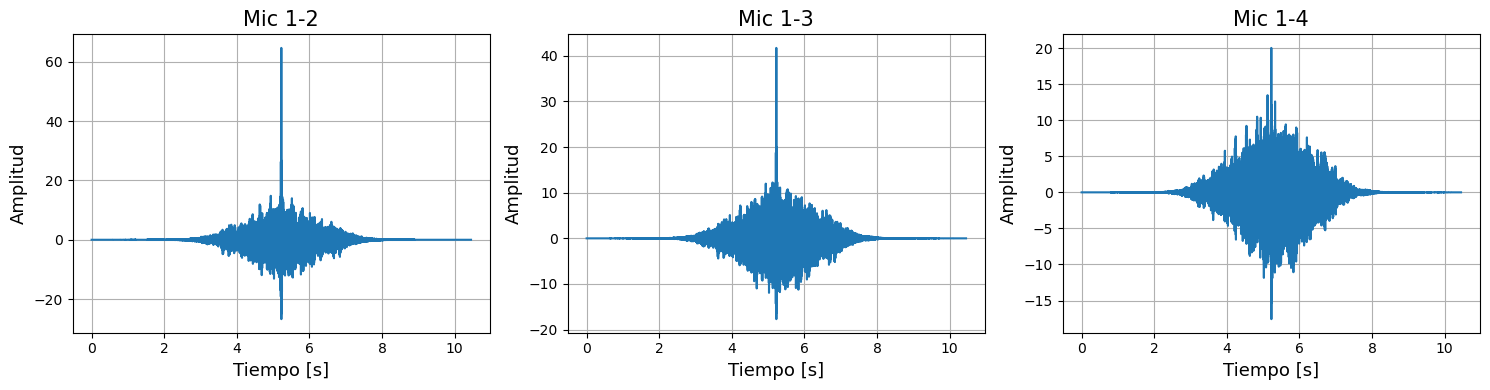

In [7]:
corr = []
for i in np.arange(len(grabaciones)-1):
    corr_class = signal.correlate(grabaciones[0], grabaciones[i+1])
    corr.append(corr_class)

_, t_corr = af.get_audio_time_array(corr[0], fs)

corr_1_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr[0]}, title="Mic 1-2", grid=True, show=False)
corr_2_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr[1]}, title="Mic 1-3", grid=True, show=False)
corr_3_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr[2]}, title="Mic 1-4", grid=True, show=False)

plot.multiplot(corr_1_pd, corr_2_pd, corr_3_pd, figsize=(15, 4), ncols=3)

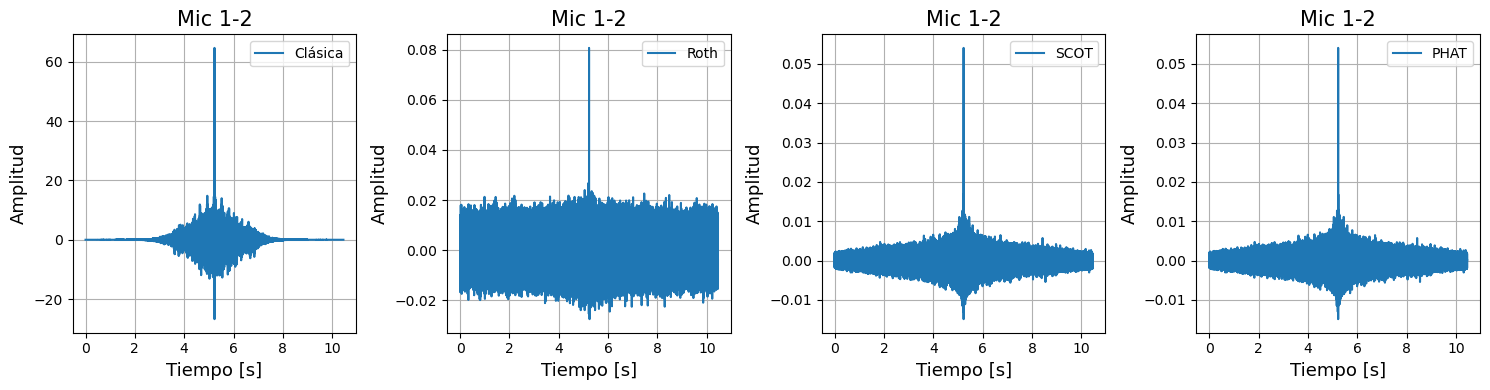

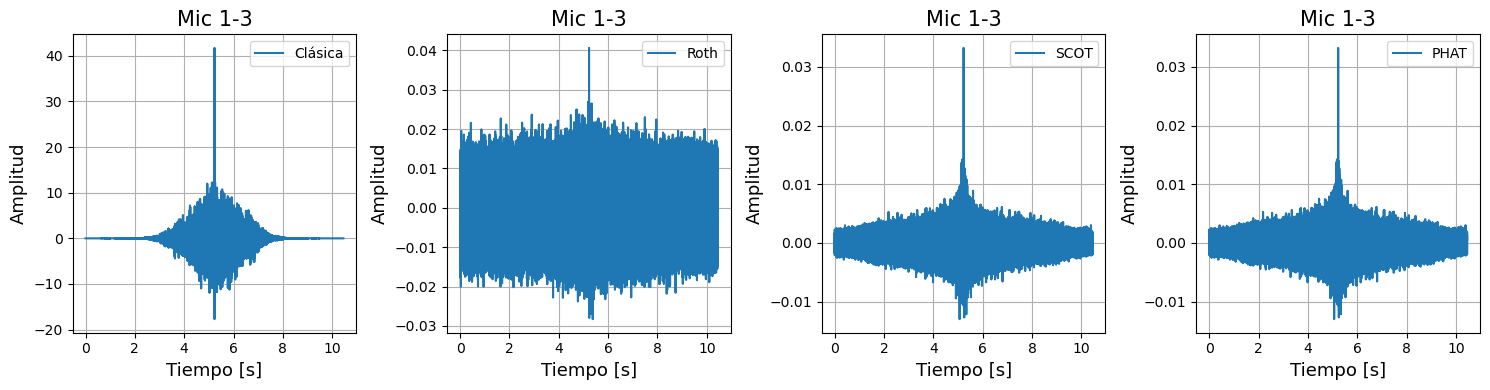

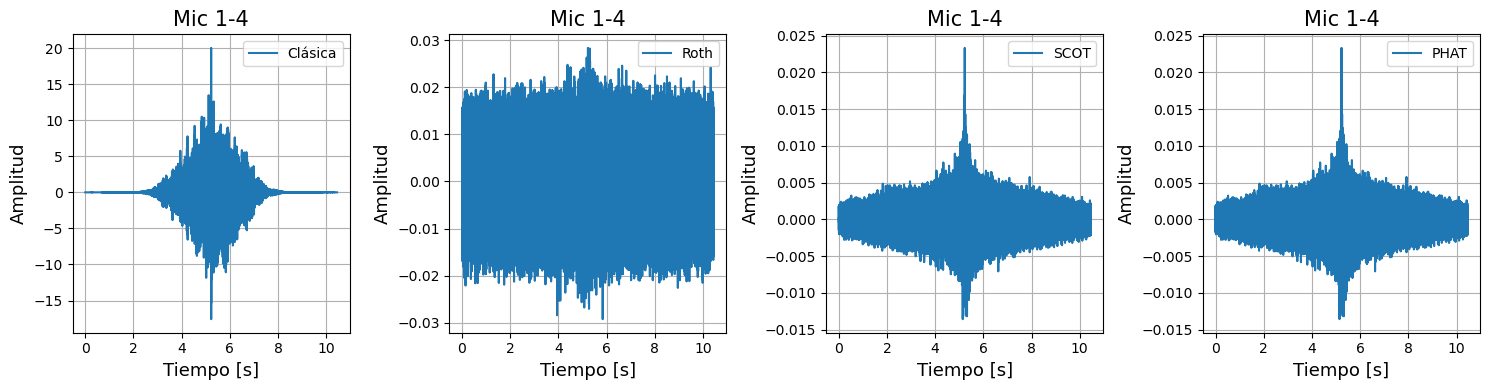

In [12]:
for i in np.arange(len(grabaciones)-1):
    corr_class = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs)
    corr_roth = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs, mode="ROTH")
    corr_scot = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs, mode="SCOT")
    corr_phat = af.cross_corr(grabaciones[0], grabaciones[i+1], fs=fs, mode="PHAT")
    _, t_corr = af.get_audio_time_array(corr_class, fs)
    corr_class_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr_class, "label":"Clásica"}, legend=True, title=f"Mic 1-{i+2}", grid=True, show=False)
    corr_roth_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr_roth, "label":"Roth"}, legend=True, title=f"Mic 1-{i+2}", grid=True, show=False)
    corr_scot_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr_scot, "label":"SCOT"}, legend=True, title=f"Mic 1-{i+2}", grid=True, show=False)
    corr_phat_pd = lambda: plot.plot_signal({"time vector":t_corr, "signal":corr_phat, "label":"PHAT"}, legend=True, title=f"Mic 1-{i+2}", grid=True, show=False)

    plot.multiplot(corr_class_pd, corr_roth_pd, corr_scot_pd, corr_phat_pd, figsize=(15, 4), ncols=4)